In [ ]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 68.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
!pip install imutils

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
import easyocr

In [ ]:
img = cv2.imread('/content/sample_data/Dzire.jpeg')


In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

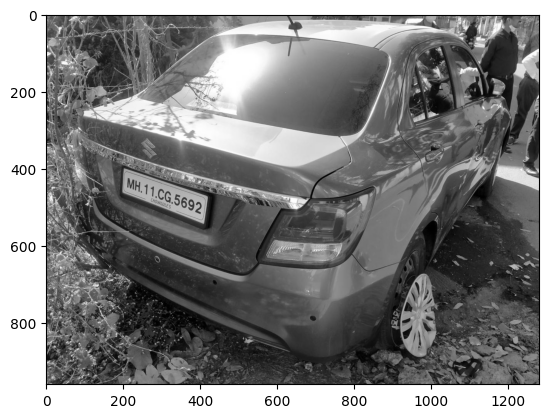

In [ ]:
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

In [ ]:
bfilter = cv2.bilateralFilter(gray, 11, 11, 17)

In [ ]:
edged = cv2.Canny(bfilter, 30, 200)

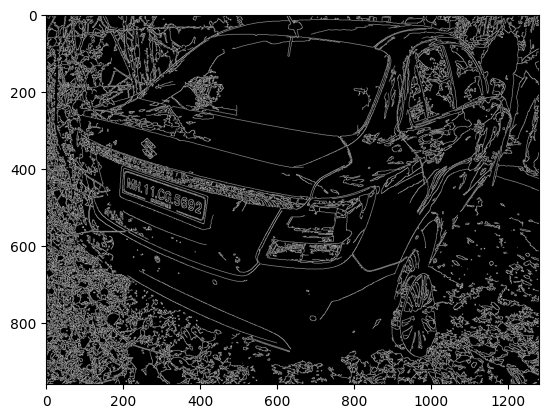

In [ ]:
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [ ]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
contours = imutils.grab_contours(keypoints)

In [ ]:
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]

In [ ]:
location = None
for contour in contours:
  # cv2.approxPolyDP returns a resampled contour, so this will still return a set of (x, y) points
  approx = cv2.approxPolyDP(contour, 10, True)
  if len(approx) == 4:
    location = approx
    break

In [ ]:
mask = np.zeros(gray.shape, np.uint8)

In [ ]:
new_image = cv2.drawContours(mask, [location], 0, 255, -1)

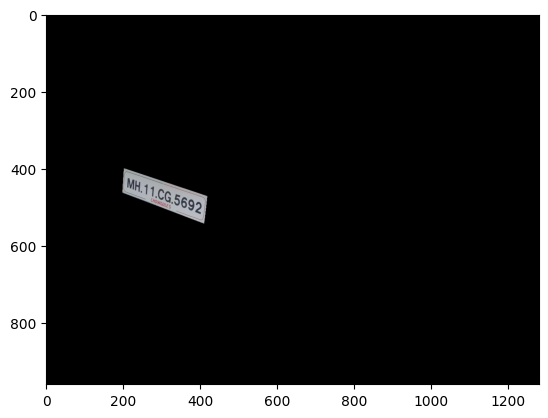

In [ ]:
new_image = cv2.bitwise_and(img, img, mask = mask)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

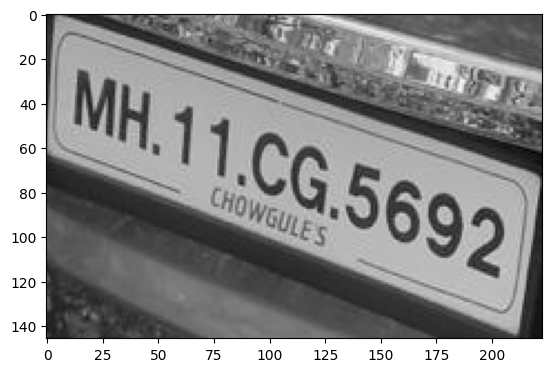

In [ ]:
(x, y) = np.where(mask == 255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
# Adding Buffer
cropped_image = gray[x1:x2+3, y1:y2+3]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
print(result)

[([[5, 19], [93, 19], [93, 79], [5, 79]], 'Mh11', 0.28992730379104614), ([[84, 46], [136, 46], [136, 96], [84, 96]], 'CG,', 0.6583454504483726), ([[134.26190718873656, 53.05477816453486], [222.96749636486499, 85.43080770819255], [205.73809281126344, 129.94522183546513], [117.032503635135, 97.56919229180745]], '5692', 0.9999645948410034), ([[74.4356673520169, 72.08126899685746], [133.9907000271106, 93.80735161027962], [127.5643326479831, 109.91873100314254], [68.0092999728894, 88.19264838972038]], 'chowgule 5', 0.6943267269769581)]


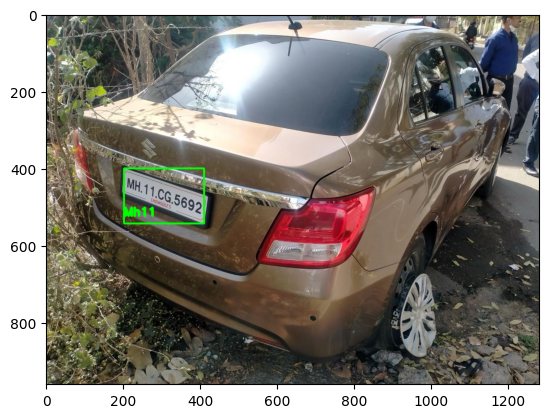

In [ ]:
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text = text, org = (approx[0][0][0], approx[1][0][1]+60), fontFace = font, fontScale = 1, color = (0, 255, 0), thickness = 5)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255, 0), 3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))